In [13]:
import sys
sys.path.append('/notebooks')

import pycap
from pycap import EnergyStorageDevice, PropertyTree
from battery import *
from energy_storage_device import Dualfoil

In [15]:
ptree = PropertyTree()
ptree.put_double('time_step', 30.0)
ptree.put_string('charge_mode', 'constant_current')
ptree.put_double('charge_current', 10.0)
ptree.put_string('charge_stop_at_1', 'voltage_greater_than')
ptree.put_double('charge_voltage_limit', 4.6)
ptree.put_bool('charge_voltage_finish', True)
ptree.put_double('charge_voltage_finish_max_time', 120) # 2 minutes after end time
ptree.put_double('charge_voltage_finish_current_limit', 5.0) # or no lower than 5 amps 

In [17]:
ptree2 = PropertyTree()
ptree2.put_double('time_step', 30.0)
ptree2.put_string('charge_mode', 'constant_voltage')
ptree2.put_double('charge_voltage', 4.6)
ptree2.put_string('charge_stop_at_1', 'current_less_than')
ptree2.put_double('charge_current_limit', 4.0)

In [14]:
D = Dualfoil(Path='../docker/')

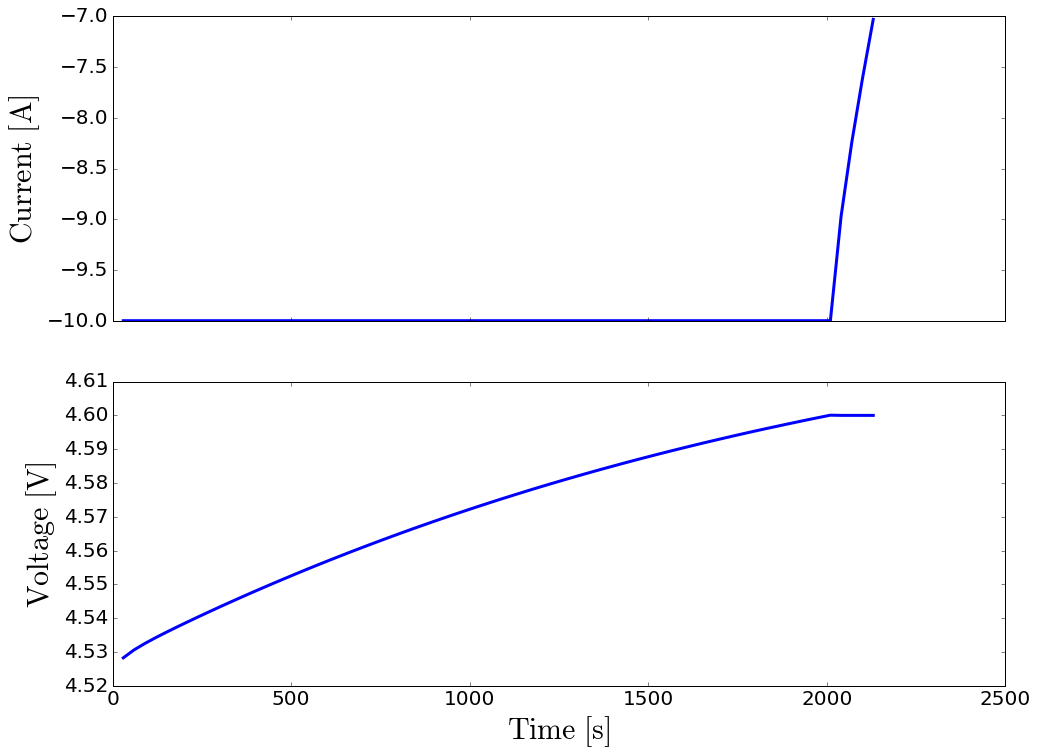

In [16]:
%matplotlib inline
from pycap import initialize_data, plot_data
data = initialize_data()

cccv = pycap.Charge(ptree)
cccv.run(D, data)
plot_data(data)

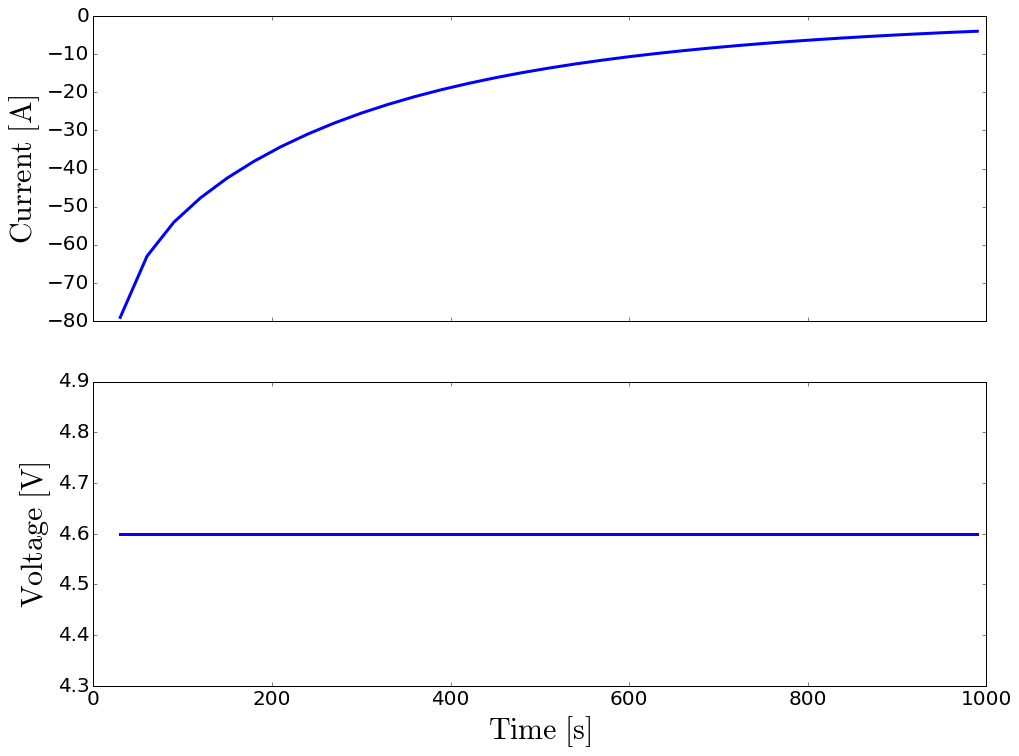

In [18]:
%matplotlib inline
from pycap import initialize_data, plot_data
data = initialize_data()

D.reset()
cccv = pycap.Charge(ptree2)
cccv.run(D, data)
plot_data(data)